**PLOTTING HISTOGRAM**

An image histogram is a graph that shows the distribution of pixel intensities in an image. It is commonly used to analyze the contrast, brightness, and overall quality of the image.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
def read_image(path):
    img = mpimg.imread(path)
    if img.ndim == 3:
        img_gray = 0.2989 * img[..., 0] + 0.5870 * img[..., 1] + 0.1140 * img[..., 2]
        return img, img_gray
    else:
        return img, img

In [ ]:
def compute_histogram(img, bins=256):
    h = np.zeros(bins, dtype=int)
    flat = img.flatten()
    for val in flat:
        idx = int(val * (bins - 1)) if val <= 1 else int(val)
        h[idx] += 1
    return h

In [ ]:
def histogram_equalization(img, bins=256):
    img_uint8 = (img * 255).astype(np.uint8)

    hist = compute_histogram(img_uint8, bins)
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf[-1]

    equalized = np.interp(img_uint8.flatten(), np.arange(0, 256), cdf_normalized * 255)
    return equalized.reshape(img.shape) / 255

In [ ]:
image_path = 'butterfly.jpg'
img_rgb, img_gray = read_image(image_path)


In [ ]:
hist_r = compute_histogram(img_rgb[..., 0])
hist_g = compute_histogram(img_rgb[..., 1])
hist_b = compute_histogram(img_rgb[..., 2])

In [ ]:
hist_gray = compute_histogram(img_gray)

In [ ]:
img_equalized = histogram_equalization(img_gray)
hist_eq = compute_histogram(img_equalized)

In [ ]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

(np.float64(-0.5), np.float64(1799.5), np.float64(1199.5), np.float64(-0.5))

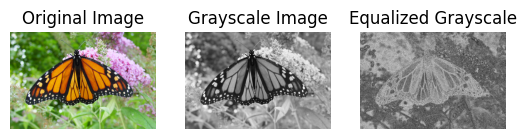

In [ ]:
plt.subplot(2, 3, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img_equalized, cmap='gray')
plt.title('Equalized Grayscale')
plt.axis('off')

Text(0, 0.5, 'Count')

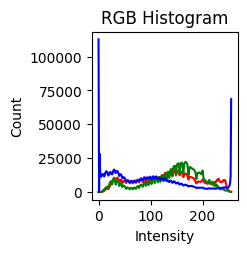

In [ ]:
plt.subplot(2, 3, 4)
plt.plot(hist_r, color='red')
plt.plot(hist_g, color='green')
plt.plot(hist_b, color='blue')
plt.title('RGB Histogram')
plt.xlabel('Intensity')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

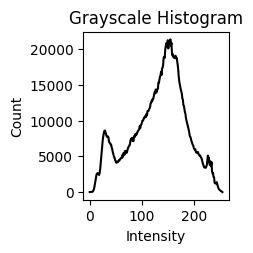

In [ ]:
plt.subplot(2, 3, 5)
plt.plot(hist_gray, color='black')
plt.title('Grayscale Histogram')
plt.xlabel('Intensity')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

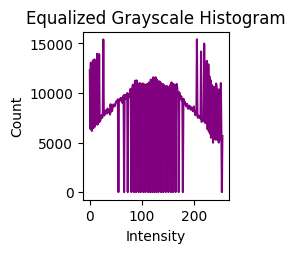

In [ ]:
plt.subplot(2, 3, 6)
plt.plot(hist_eq, color='purple')
plt.title('Equalized Grayscale Histogram')
plt.xlabel('Intensity')
plt.ylabel('Count')

In [ ]:
def histogram_stretching(img):
    img = img.astype(np.uint8)

    min_val = img.min()
    max_val = img.max()

    if max_val == min_val:
        return np.zeros_like(img)

    stretched = (img.astype(np.float32) - min_val) * (255.0 / (max_val - min_val))
    stretched = np.clip(stretched, 0, 255).astype(np.uint8)

    return stretched

In [ ]:
img_stretch = histogram_stretching(img_gray)
hist_stretch = compute_histogram(img_stretch)

(np.float64(-0.5), np.float64(1799.5), np.float64(1199.5), np.float64(-0.5))

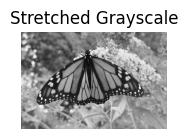

In [ ]:
plt.subplot(3,3,7)
plt.imshow(img_stretch, cmap='gray', vmin=0, vmax=255)
plt.title('Stretched Grayscale')
plt.axis('off')



Text(0, 0.5, 'Count')

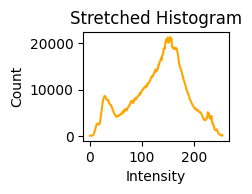

In [ ]:
plt.subplot(3,3,8)
plt.plot(hist_stretch, color='orange')
plt.title('Stretched Histogram')
plt.xlabel('Intensity')
plt.ylabel('Count')